# __Photonic Tensor Data Loading__

In this Section, we present how to encode classical data using the tensor encoding method. In here, we consider 2-dimensional data such that:

$\forall x \in \mathbb{R}^{d_1 \times d_2}, \quad \longrightarrow \quad \rho_x = \ket{x}\bra{x} \quad \text{with} \quad \ket{x} = \sum_{(i,j) \in [d_1]\times[d_2]} \frac{x_{i,j}}{||x||}\ket{e_i,e_j}$


## <mark>Classical Data Loading and Preprocessing</mark>

We propose different classical data loading method. We focus on digits dataset, namely the <span style="color:red">sklearn digit</span> dataset, the <span style="color:red">keras MNIST</span> dataset, and the <span style="color:red">pennylane BAS</span> dataset. We consider the different possibilities: 
1. Loading the raw data from both datasets
2. Reducing the dimension using Principal Component Analysis (PCA)
3. Reducing the dimension using the Average Pooling method

Let's start with loading the <span style="color:magenta">raw data</span>:

In [1]:
### Loading the required libraries
import os, sys

sys.path.append(os.path.dirname(os.path.abspath('')))

import warnings
import time
import torch

from Classical_Data import *

# Hyperparameters:
batch_size = 1
train_dataset_number = 100
test_dataset_number = 100
class_set = [0, 1]

# Sklearn digit dataset:
print('Sklearn digit dataset:')
train_dataloader_sklearn, test_dataloader_sklearn = Digits_sklearn_raw(class_set, train_dataset_number, test_dataset_number, batch_size)
# Tensorflow MNIST dataset:
print('Tensorflow MNIST dataset:')
train_dataloader_mnist, test_dataloader_mnist = MNIST_tensorflow_raw(class_set, train_dataset_number, test_dataset_number, batch_size)
# Pennylane Bars and Stripes dataset:
print('Pennylane Bars and Stripes dataset:')
train_data_loader_bas, test_dataloader_bas = BAS_pennylane_special(4, train_dataset_number, test_dataset_number, batch_size)

Sklearn digit dataset:
Train data and label tensors of size:(100, 8, 8) and (100,)
Test data and label tensors of size:(100, 8, 8) and (100,)
Tensorflow MNIST dataset:
Train data and label tensors of size:(100, 28, 28) and (100,)
Test data and label tensors of size:(100, 28, 28) and (100,)
Pennylane Bars and Stripes dataset:


/Users/leomonbroussou/Documents/GitHub/Photonic_Simulation_QCNN/Data_Loading/toolbox_data.py:75: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  tensor_train_data, tensor_test_data = torch.tensor(train_list_data_array, dtype=torch.float32), torch.tensor(test_list_data_array, dtype=torch.float32)


Train data and label tensors of size:(100, 4, 4) and (100,)
Test data and label tensors of size:(100, 4, 4) and (100,)


We plot the raw data from each dataset:

<Figure size 640x480 with 0 Axes>

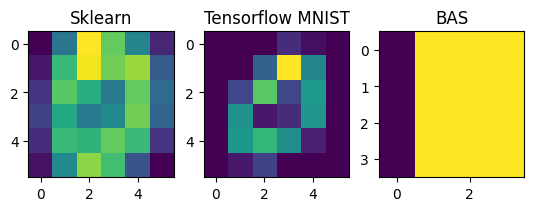

In [9]:
import matplotlib.pyplot as plt

sample = 3

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3)
axarr[0].imshow(train_dataloader_sklearn.dataset.tensors[0][0])
axarr[0].title.set_text('Sklearn')
axarr[1].imshow(train_dataloader_mnist.dataset.tensors[0][0])
axarr[1].title.set_text('Tensorflow MNIST')
axarr[2].imshow(train_data_loader_bas.dataset.tensors[0][sample])
axarr[2].title.set_text('BAS')

label: tensor(1)
tensor([[-1.,  1.,  1.,  1.],
        [-1.,  1.,  1.,  1.],
        [-1.,  1.,  1.,  1.],
        [-1.,  1.,  1.,  1.]])


<Figure size 640x480 with 0 Axes>

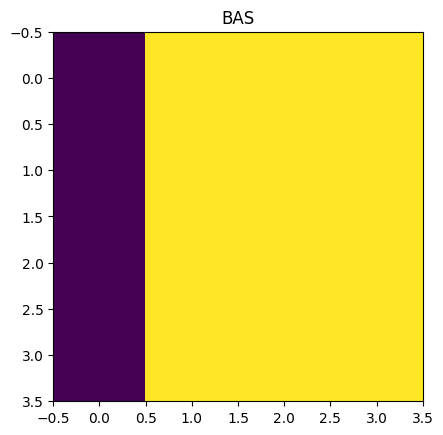

In [12]:
import matplotlib.pyplot as plt


sample = 3

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,1)
axarr.imshow(train_data_loader_bas.dataset.tensors[0][sample])
axarr.title.set_text('BAS')

print("label:", train_data_loader_bas.dataset.tensors[1][sample])
print(train_data_loader_bas.dataset.tensors[0][sample])

One can preprocess the classical data by using different technics. We investigate two of them: Principal Components Analysis (PCA) and the use of average Pooling method.

Let's start with <span style="color:magenta">Principal Component Analysis</span> data reduction:

In [4]:
# Hyperparameters:
batch_size = 1
train_dataset_number = 100
test_dataset_number = 100
class_set = [0, 1]
nbr_rows, nbr_cols = 6, 6 

# Sklearn digit dataset:
print('Sklearn digit dataset:')
train_dataloader_sklearn, test_dataloader_sklearn = Digits_sklearn_PCA(class_set, train_dataset_number, test_dataset_number, batch_size, nbr_rows, nbr_cols)
# Tensorflow MNIST dataset:
print('Tensorflow MNIST dataset:')
train_dataloader_mnist, test_dataloader_mnist = MNIST_tensorflow_PCA(class_set, train_dataset_number, test_dataset_number, batch_size, nbr_rows, nbr_cols)

Sklearn digit dataset:
(100, 6, 6) (100,) (100, 6, 6) (100,)
Tensorflow MNIST dataset:
(100, 6, 6) (100,) (100, 6, 6) (100,)


Let's consider <span style="color:magenta">Average Pooling</span> data reduction:

In [5]:
# Hyperparameters:
batch_size = 1
train_dataset_number = 100
test_dataset_number = 100
class_set = [0, 1]
nbr_rows, nbr_cols = 6, 6 

# Sklearn digit dataset:
print('Sklearn digit dataset:')
train_dataloader_sklearn, test_dataloader_sklearn = Digits_sklearn_Pooling(class_set, train_dataset_number, test_dataset_number, batch_size, nbr_rows, nbr_cols)
# Tensorflow MNIST dataset:
print('Tensorflow MNIST dataset:')
train_dataloader_mnist, test_dataloader_mnist = MNIST_tensorflow_Pooling(class_set, train_dataset_number, test_dataset_number, batch_size, nbr_rows, nbr_cols)

Sklearn digit dataset:
(100, 6, 6) (100,) (100, 6, 6) (100,)
Tensorflow MNIST dataset:
(100, 6, 6) (100,) (100, 6, 6) (100,)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

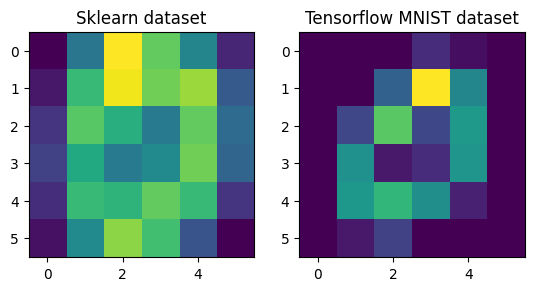

In [6]:
plt.figure()

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2)
axarr[0].imshow(train_dataloader_sklearn.dataset.tensors[0][0])
axarr[0].title.set_text('Sklearn dataset')
axarr[1].imshow(train_dataloader_mnist.dataset.tensors[0][0])
axarr[1].title.set_text('Tensorflow MNIST dataset')

## <mark>Quantum Data Loader</mark>

In this part, we explain how to perform the quantum data loader using a photonic plateform. We consider 2-dimensional data such that:

$\forall x \in \mathbb{R}^{d_1 \times d_2}, \quad \longrightarrow \quad \rho_x = \ket{x}\bra{x} \quad \text{with} \quad \ket{x} = \sum_{(i,j) \in [d_1]\times[d_2]} \frac{x_{i,j}}{||x||}\ket{e_i,e_j}$
